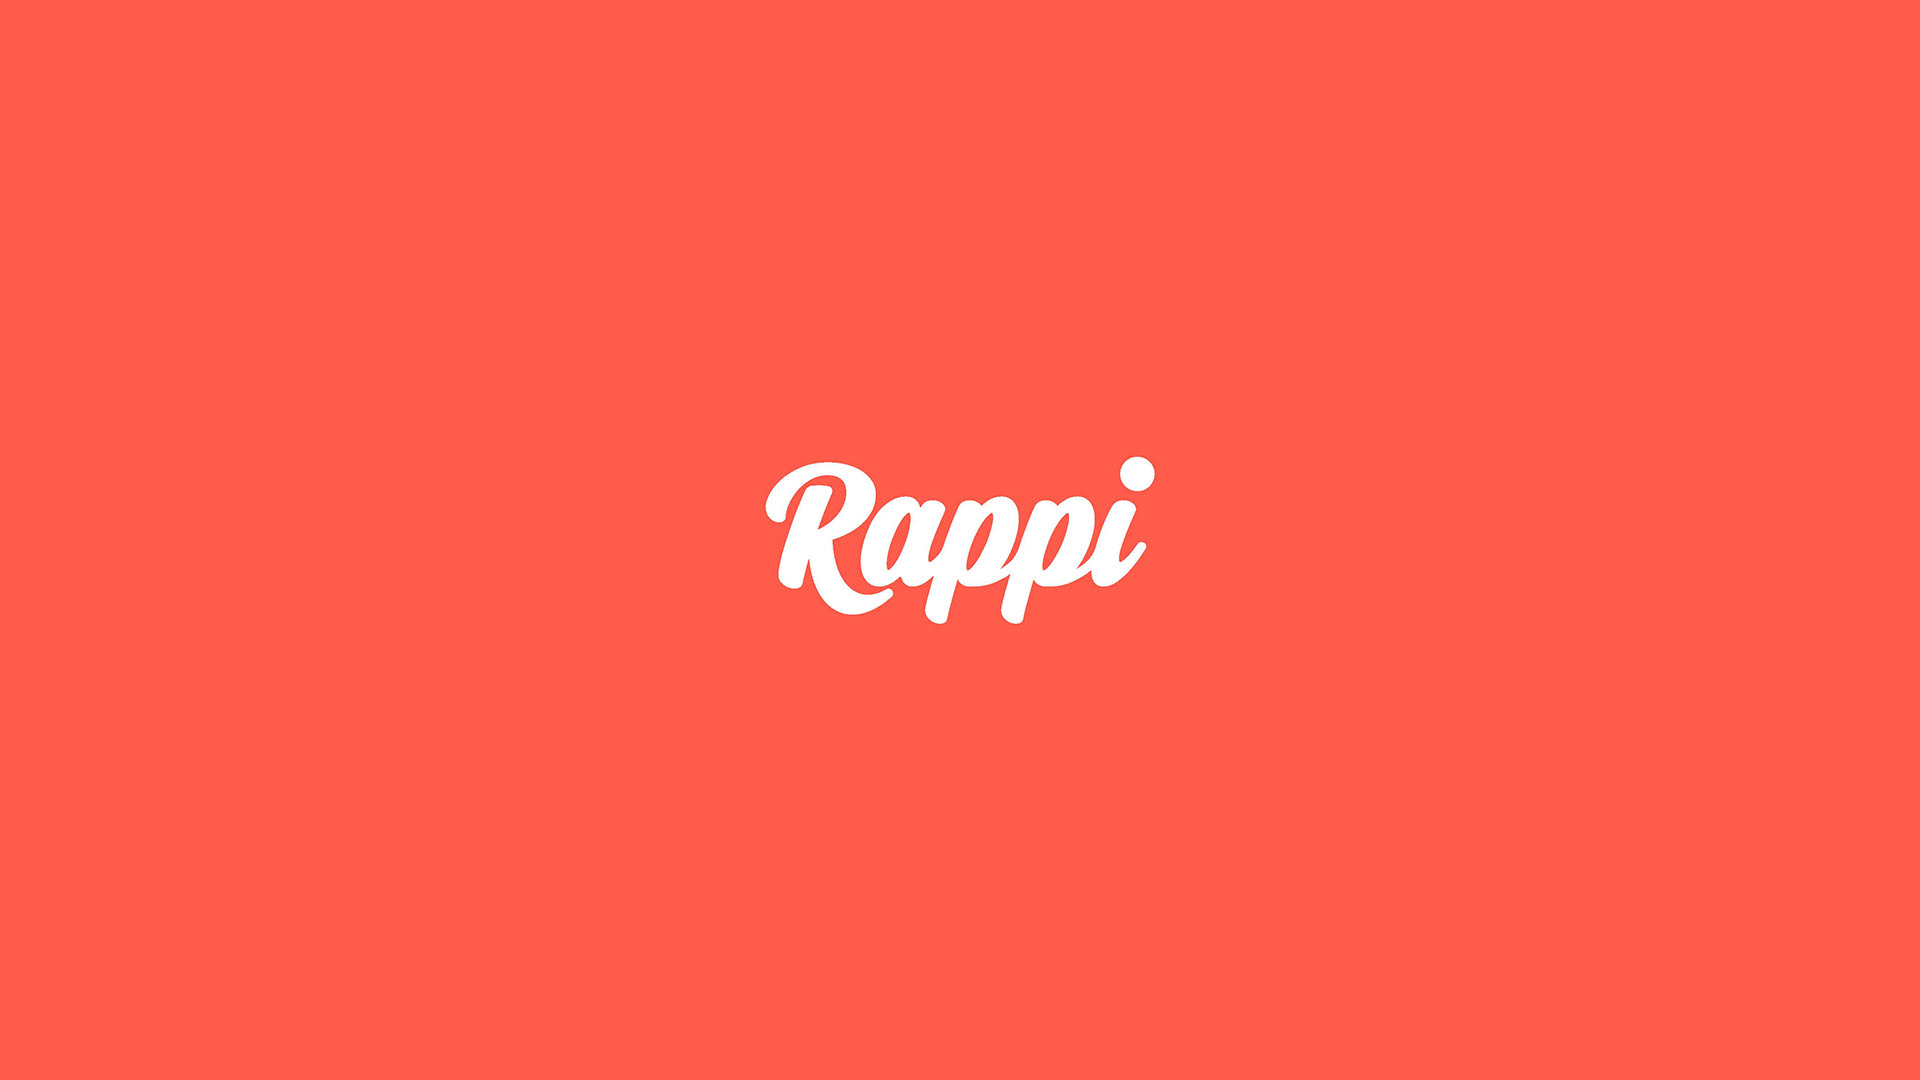


# Instalação das bibliotecas 

* Para essa determinada área, fazemos a importação das bibliotecas necessárias para o processo do nosso código.

In [1]:
# Importação dos arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import date
from datetime import datetime
import seaborn as sns; sns.set();
import plotly.express as px;
import pyarrow.feather as feather
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

* Nessa pequena área, fazemos a conexão com o drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importação das features

* Com a conexão ao drive, fizemos uma pasta compartilhada com todas as colunas das nossas features, as quais importamos e transformamos em CSV para ocupar menos RAM do Colab.

In [11]:
#importação da features taxa de aceitação 
acceptance_tax = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/acceptance_tax.csv")

#importação da coluna com todos os entregadores
all_storekeepers = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/all_storekeepers.csv")

#importação da feature de auto aceite
auto_accept = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/auto_accept.csv")

#importação da feature de quantitativo de churns
churns_quantitative = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/churns_quantitative.csv")

#importação da feature de defeitos medios
defects_mean = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/defects_mean.csv")

#importação da feature de ganho medio por modal
media_modal = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/media_modal.csv")

#importação da feature de quantitativo de punições
punishment_quantitative = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/punishment_quantitative.csv")

#importação da feature de taxa de cancelamento de pedidos
storekeeper_cancel_tax = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/storekeeper_cancel_tax.csv")

#importação da feature de categoria do entregador
storekeeper_category = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/storekeeper_category.csv")

* Nessa área, fazemos uma pequena limpeza nas determinadas colunas, limpeza essa que é um drop na coluna específica "Churn(sim=1/não=0)_x". Pelo fato de estar enviesando o algoritmo e atrapalhando nos resultados.


In [4]:
# removendo a coluna intitulada de "Churn(sim=1/não=0)_x" para evitar bugs

all_storekeepers = all_storekeepers.drop(columns = ["Churn(sim=1/não=0)_x"])
auto_accept = auto_accept.drop(columns = ["Churn(sim=1/não=0)_x"])
churns_quantitative = churns_quantitative.drop(columns = ["Churn(sim=1/não=0)_x"])
defects_mean = defects_mean.drop(columns = ["Churn(sim=1/não=0)_x"])
media_modal = media_modal.drop(columns = ["Churn(sim=1/não=0)_x"])
punishment_quantitative = punishment_quantitative.drop(columns = ["Churn(sim=1/não=0)_x"])
storekeeper_cancel_tax = storekeeper_cancel_tax.drop(columns = ["Churn(sim=1/não=0)_x"])
storekeeper_category = storekeeper_category.drop(columns = ["Churn(sim=1/não=0)_x"])

# Manipulação dos dados

* Aqui nessa área, fazemos a criação do dataframe com as determinadas colunas das nossas features (colunas as quais importamos anteriormente)

In [5]:
# Fazendo o merge das features para criarmos o dataframe que será utilizado no modelo

a = acceptance_tax.merge(auto_accept, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature de taixa de aceitação

b = a.merge(churns_quantitative, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature de quantidades de churn, no final acabou nao sendo utilizada

c = b.merge(defects_mean, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature de quantidades de defeitos

d = c.merge(media_modal, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature do modal ultilizado pelo entregador

e = d.merge(punishment_quantitative, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature com a quantidade de punicoes levadas pelo entregador

f = e.merge(storekeeper_cancel_tax, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID')
# Feature com a quantidade de cancelamentos de entregas feito pelo entregador

g = f.merge(storekeeper_category, how='inner', left_on='STOREKEEPER_ID', right_on='ID').drop(columns=['ID_x','ID_y'])
# Feature da categoria que o entregador se apresenta

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


* Fizemos um replace representativo, somente para ficar mais visual, dos RT's que são Churn e Não Churn (sendo respectivamente 1 e 0). Além disso, transformamos os resultados *booleanos* da coluna 'AUTO_ACEITE' em *binário*. Por fim, chamamos a variável para verificar o dataframe.

In [6]:
g['Churn(sim=1/não=0)_x'].replace({1:'CHURN', 0:'NÂO_CHURN'}, inplace=True) # Transformar o  'CHURN' e 'NÂO_CHURN' em 1 e 0
g['AUTO_ACEITE'] = g['AUTO_ACEITE'].astype(int) # "astype(int)" transformar o False e True da coluna em 0 e 1
g

,STOREKEEPER_ID,ACCEPTANCE_RATE,Churn(sim=1/não=0)_x,AUTO_ACEITE,Count,ORDERS,TRANSPORTE,Media_Modal_sim1_não0,Quantidade Punições,Taxa,LEVEL_NAME,Earning_Cat
0,907442.0,0.666102,CHURN,1,1161.0,5.189542,bicycle,1.0,11.0,0.044025,bronze,0.0
1,1393441.0,0.556538,CHURN,1,276.0,3.806122,bicycle,1.0,86.0,0.103806,bronze,1.0
2,1061798.0,0.777838,CHURN,1,1360.0,8.109375,car,1.0,27.0,0.042910,bronze,1.0
3,103460.0,0.160980,CHURN,1,120.0,2.945946,bicycle,0.0,13.0,0.030000,bronze,0.0
4,1259998.0,0.856102,CHURN,1,1316.0,6.764286,bicycle,1.0,160.0,0.089799,bronze,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
164526,1399167.0,0.000000,CHURN,1,2.0,2.000000,motorbike,0.0,0.0,0.000000,rookie,0.0
164527,824240.0,0.000000,NÂO_CHURN,0,0.0,1.105263,neither,0.0,1.0,0.281046,rookie,0.0
164528,1112422.0,0.000000,NÂO_CHURN,0,0.0,1.041667,neither,0.0,1.0,0.960000,bronze,0.0
164529,1256781.0,0.000000,NÂO_CHURN,0,0.0,1.066667,neither,0.0,0.0,1.000000,rookie,0.0


# Balanceamento das features

* Primeiramente, dividimos nossas features em duas novas variáveis, X e Y, no sentido que os resultados de X afetassem Y. Para isso, fizemos o balanceamento dos dados internos, a partir de um oversample. 

* No processo de oversample, o qual objetificamos usar para balancear as features, há a manipulação das samples - que é pepar uma amostra dos dados e não a população total - aproximando a descrepância entre as "amostras" que são aplicadas nas colunas.

* Por fim, fazemos a divisão dos dados para treino e teste das nossas features, pois dessa forma irá facilitar na hora de rodar o código... Na parte final, há valores usados como semente para a preparação do treino e teste (podem ser alterados, mas é sugerido verificar a documentação do sklearn)

In [7]:
# Dividindo x e y
x = g[['ACCEPTANCE_RATE', 'AUTO_ACEITE', 'ORDERS', 'Media_Modal_sim1_não0', 'Quantidade Punições', 'Taxa', 'Earning_Cat']]
y = g[["Churn(sim=1/não=0)_x"]]



# Balanceamento das features

oversample = RandomOverSampler(sampling_strategy='minority') # manipula as samples aumentando o número de samples onde a minoria se mostra muito discrepante
x_over, y_over = oversample.fit_resample(x, y) # realiza o oversample nas variaveis selecionadas


# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, 
                                                    test_size = 0.2, 
                                                    random_state = 1) # qualquer valor como semente do pseudo-random

# Treino do algoritmo

* Após a manipulação dos dados e do balanceamento dos mesmos, além de já ter dividido os dados para o treino e teste, agora iremos fazer os treinos. 
* Para isso, demonstramos a situação dos dados antes da aplicação do *oversample* e após a aplicação do *oversample*.
* Os resultados mostram como houve uma "limpeza" e diminuição nos valores, facilitando na preparação para o teste.

In [10]:
#mostra o numero de samples antes do oversample
print("Antes")
print(len(y_over))
print(len(x_over))

# mostra o numero de samples depois do oversample
print("Depois")
print(len(x))
print(len(y))

Antes
255768
255768
Depois
164531
164531


#- A partir desse ponto, começamos a fazer as produções dos algoritmos e aplicação dos hiperparâmetros e parâmetros dos respectivos algoritmos.

# Decision Tree

* Começando pelo Decision Tree, obtemos o modelo desse algoritmo no modelo de Classificação. 
* Aplicamos o X e Y de treino e, logo depois, printamos os resultados de treino e teste

In [ ]:
dt = DecisionTreeClassifier() # modelo decision tree (dentro da variavel dt)
dt.fit( x_train, y_train.squeeze() ) # Squeeze() -> df para séries (treina o algoritimo)
print('Acuracidade (treino): ', dt.score( x_train, y_train ))# mostra a acuracidade de treino
print('Acuracidade (teste): ', dt.score( x_test, y_test ))# mostra a acuracidade de teste

Acuracidade (treino):  0.9790630162158992
Acuracidade (teste):  0.8635297337451616


* Após obter os resultados de acurácia, aplicamos os mesmos em outras métricas.
* **Sendo uma dessas métricas, a Revocação/Recall, escolhida para seguir durante a produção do modelo**.

In [ ]:
# Teste de Acurácidade (accuracy)
y_pred = dt.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN" ))# mostra o resultado de revocação do modelo
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" ))# mostra o resultado da precisão do modelo
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" ))# mostra o resultado do f1 score do modelo

Revocação:  0.7976491651422567
Precisão:  0.9200035913090321
F1_score:  0.8544685109132981


* Após obter todos os resultados, partimos para a produção da matriz de confusão, para analisar os resultados.
* True Label: Verdadeiros apresentados pelos dados
* Predicted Label: É o que o modelo realmente prevê
* Resumo: 
  * Ponta superior esquerda: Preveu que dariam Churn e realmente deram Churn.
  * Ponta inferior esquerda: Preveu que dariam Churn mas Não deram Churn.
  * Ponta superior direita: Preveu que Não dariam Churn mas deram Churn.
  * Ponta inferior direita: Preveu que Não dariam Churn e Não deram Churn

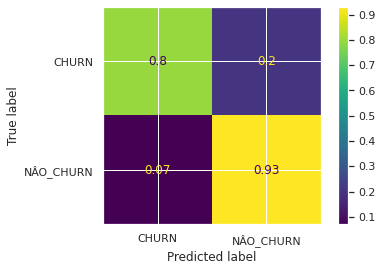

In [ ]:
# Matriz de confusão 

# Realizando predições com o conjunto de teste
y_pred = dt.predict(x_test)
y_pred

# Lembrando que o y verdadeiro para o conjunto de teste é o y_test
y_true = y_test

cm = confusion_matrix(y_true, y_pred, normalize='true')# geração da matriz de confusão

# Versão visual mais bonita da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=dt.classes_)

disp.plot()# gera o grafico com o plotly
plt.show()# mostra o grafico gerado

## Hiperparâmetros ⭕ *não mudou quase nada

* Para essa área, aplicamos o hiperparâmetro + os Parâmetros do Decision Tree.
  * Hiperparâmetro Escolhido: RandomizedSearchCV
  * Parâmetros: criterion + max_depth + min_samples_split
* Essas escolhas foram feitas a partir do aprendizado da aula e análise da documentação do sklearn (Decision_TreeClassifier sklearn)

In [ ]:
# Hiperparametros escolhidos para a random forest
parametros = {'criterion': ['gini', 'entropy','log_loss'],# Determina os outcomes do modelo
              'max_depth': [4,90,5,422],# Representa a profundidade de cada árvore do algoritmo
              'min_samples_split': [2, 4, 8] # Representa o minimo de amostras requiridas para subdividir o parametro interno da arvore dentro da random forest
}

random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions = parametros, cv = 10, verbose = 2, n_jobs = 2) # Distribuição dos parâmetros e como eles serão alocados no modelo
random_search.fit(x_train, y_train.squeeze()) # Definição de variáveis de treino

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [4, 90, 5, 422],
                                        'min_samples_split': [2, 4, 8]},
                   verbose=2)

In [ ]:
print(random_search.best_score_)# Demosntração do melhor score adquirido depois dos hiperparâmetros
print(random_search.best_params_)# Demosntração dos parâmetros que tiveram melhor desempenho para o modelo

0.8551761009025416
{'min_samples_split': 2, 'max_depth': 90, 'criterion': 'gini'}


In [ ]:
h = random_search.best_estimator_ # Estimator que teve o maior score(dentro da variável)
h # Variável no qual o best_estimator foi armazenado para ser mostrada no output

DecisionTreeClassifier(max_depth=90)

* Após todo um processo de análise e reprocesso de treino e teste a partir dos parâmetros aplicados, é possível obter diferentes resultados.
* Para o caso do Decision Tree, não houveram grandes mudanças.

In [ ]:
y_pred = h.predict(x_test) # Resultado da predição do modelo
print('Acc treino: ', h.score(x_train, y_train )) # Resultado da acurácia de treino
print('Acc teste: ', h.score(x_test, y_test.squeeze())) # Resultado da acurácia de teste
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN")) # Resultado da revocação do modelo
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" )) # Resultado da precisão do modelo
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN")) # Resultado da f1 score do modelo

Acc treino:  0.9790630162158992
Acc teste:  0.8638425147593541
Revocação:  0.7987778772428288
Precisão:  0.9195716462048571
F1_score:  0.8549290787527858


# Random Forest

* A estrutura de código do Random Forest segue a mesma estrutura do Decision Tree, só muda o tipo de modelo aplicado - sendo esse o RandomForestClassifier.

In [ ]:
modelo = RandomForestClassifier()# modelo random forest (dentro da variavel modelo)
modelo.fit( x_train, y_train.squeeze() )# definição das variaveis de treino e teste 
print('Acc treino: ', modelo.score(x_train, y_train )) # Printar a acurácia de treino 
print('Acc teste: ', modelo.score(x_test, y_test.squeeze() )) # Printar a acurácia de teste 

Acc treino:  0.9790630162158992
Acc teste:  0.8926965633186066


In [ ]:
y_pred = modelo.predict(x_test)# predição do modelo
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN" )) # Printar a Revocação
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" )) # Printar a Precisão
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" )) # Printar a F1_score

Revocação:  0.853306348032538
Precisão:  0.9272542716968364
F1_score:  0.8887447554573646


## Hiperparâmetros ⏬ *piorou os resultados

* Para essa área, aplicamos o hiperparâmetro + os Parâmetros do RandomForest.
  * Hiperparâmetro Escolhido: RandomizedSearchCV
  * Parâmetros: n_estimators + criterion + max_depth + min_samples_split
* Essas escolhas foram feitas a partir do aprendizado da aula e análise da documentação do sklearn (RandomForestClassifier sklearn)

In [ ]:
parametros = {'n_estimators': [101, 178],# Número de arvores que serão utilizadas na random forest
               'criterion': ['gini', 'entropy','log_loss'],# Determina os outcomes do modelo
              'max_depth': [4,90,5,29,78],# Representa a profundidade de cada árvore do algoritmo
              'min_samples_split': [7, 15, 30]# Representa o mínimo de amostras requiridas para subdividir o parâmetro interno da árvore dentro da random forest
}

random_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = parametros, cv = 10, verbose = 2, n_jobs = 2)# Distribuição dos parâmetros e como eles serão alocados no modelo
random_search.fit(x_train, y_train.squeeze()) # Definição de variaveis de treino

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-pac

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [4, 90, 5, 29, 78],
                                        'min_samples_split': [7, 15, 30],
                                        'n_estimators': [101, 178]},
                   verbose=2)

In [ ]:
print(random_search.best_score_) # Demosntração do melhor score adquirido depois dos hiperparâmetros
print(random_search.best_params_) # Demonstração do parâmetro que teve melhor desempenho para o modelo

0.8641197496713557
{'n_estimators': 178, 'min_samples_split': 7, 'max_depth': 78, 'criterion': 'gini'}


In [ ]:
i = random_search.best_estimator_ # Estimator que teve maior score
i # Variável onde o best_estimator foi colocado

RandomForestClassifier(max_depth=78, min_samples_split=7, n_estimators=178)

* Para o caso do RandomForest, os resultados pioraram.

In [ ]:
y_pred = i.predict(x_test) # Resultado da predição do modelo
print('Acc treino: ', i.score(x_train, y_train )) # Resultado da acurácia de treino
print('Acc teste: ', i.score(x_test, y_test.squeeze() )) # Resultado da acurácia de teste
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN" )) # Resultado da revocação do modelo
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" )) # Resultado da precisão do modelo
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" )) # Resultado da f1 score do modelo

Acc treino:  0.97122875267577
Acc teste:  0.8745357156820581
Revocação:  0.8433425446619702
Precisão:  0.9005444495241262
F1_score:  0.8710053463038148


# KNN

* A estrutura de código do KNN segue a mesma estrutura do Decision Tree, só muda o tipo de modelo aplicado - sendo esse o KNNClassifier.

In [ ]:
# Instaciação do obj Algoritmo
knn = KNeighborsClassifier(n_neighbors=7) #numero de neighbors considerados pelo modelo
# Treino # x = Features, y = Label/Target
knn.fit( x_train, y_train.squeeze() ) # squeeze() -> df para series
print('Acuracidade (treino): ', knn.score( x_train, y_train )) #acuracidade do treino
print('Acuracidade (teste): ', knn.score( x_test, y_test )) #acuracidade do teste

Acuracidade (treino):  0.7906301621589921
Acuracidade (teste):  0.7206279078859913


In [ ]:
# Teste de Acuracidade (accuracy)
y_pred = knn.predict(x_test) # Resultado da predição do modelo
print( 'Revocação: ', recall_score( y_test, y_pred , pos_label="CHURN")) # Resultado da revocação do modelo
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" )) # Resultado da precisão do modelo
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" )) # Resultado da f1 score do modelo

Revocação:  0.6594013933756276
Precisão:  0.753580642291611
F1_score:  0.7033523611831863


## Hiperparâmetros ⏫ *melhorou os resultados

* Para essa área, aplicamos o hiperparâmetro + os Parâmetros do KNN.
  * Hiperparâmetro Escolhido: RandomizedSearchCV
  * Parâmetros: n_neighbors + weights + algorithm + leaf_size
* Essas escolhas foram feitas a partir do aprendizado da aula e análise da documentação do sklearn (KNNClassifier sklearn)

In [ ]:
# Definir o espaço possível dos hiperparâmetros a serem testados no modelo
parametros = {'n_neighbors': [3, 5, 7, 9, 13, 17, 21, 29], # Número de neighbors considerados pelo modelo
              'weights': ['uniform', 'distance'], # Parâmetro do knn onde uniform é analisado todos os pontos de cada "neighborhood", no qual analisa-se com o mesmo "peso". Já o distance é analisado onde o peso dos pontos é definido pelo inverso da sua distância aos mais próximos que possuem  mais peso
              'algorithm': ['auto', # ‘Auto’ vai se definir nos valores passados no fit
                            'ball_tree', # BallTree é utilizado para  problemas "N-points" rapidos e generalizados 
                            'kd_tree', # KdTree é utilizado para  problemas "N-points" rapidos e generalizados 
                            'brute'], # Utilização do search de forma forçada
              'leaf_size': [15, 30, 45, 60]} # Tamanho da "folha" passada para o BallTree ou KdTree

random_search = RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions = parametros, cv = 10, verbose = 2, n_jobs = 2) # Distribuição dos parâmetros e como eles serão alocados no modelo
random_search.fit(x_train, y_train.squeeze()) # Definição de variáveis de treino

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=2,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [15, 30, 45, 60],
                                        'n_neighbors': [3, 5, 7, 9, 13, 17, 21,
                                                        29],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [ ]:
print(random_search.best_score_) # Mostrando o melhor score adiquirido depois dos hiperparâmetros
print(random_search.best_params_) # Mostrando parâmetro que teve melhor desempenho para o modelo

0.8074863180447599
{'weights': 'distance', 'n_neighbors': 5, 'leaf_size': 45, 'algorithm': 'kd_tree'}


In [ ]:
j = random_search.best_estimator_ # Estimator que teve o maior score
j # Variável onde o best_estimator foi instanciado 

KNeighborsClassifier(algorithm='kd_tree', leaf_size=45, weights='distance')

* Para o caso do KNN, os resultados melhoraram.

In [ ]:
y_pred = j.predict(x_test) # Resultado da predição do modelo
print('Acc treino: ', j.score(x_train, y_train)) # Resultado da acurácia de treino
print('Acc teste: ', j.score(x_test, y_test.squeeze() )) # Resultado da acurácia de teste
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN" )) # Resultado da revocação do modelo
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" )) # Resultado da precisão do modelo
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" )) # Resultado da f1 score do modelo

Acc treino:  0.9771081157692044
Acc teste:  0.8152050670524299
Revocação:  0.6916669910092244
Precisão:  0.9206817946326805
F1_score:  0.7899099899988887
